### Importing the required libraries 

In [301]:
import sys
print(sys.version)

3.12.6 (tags/v3.12.6:a4a2d2b, Sep  6 2024, 20:11:23) [MSC v.1940 64 bit (AMD64)]


In [302]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
%matplotlib inline

In [303]:
df = pd.read_csv("rainfall in india 1901-2015.csv")
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [304]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


## Data Exploration and Pre-Processing

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [306]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [307]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [308]:
df.duplicated().sum()

np.int64(0)

In [309]:
df['SUBDIVISION'].value_counts()

SUBDIVISION
NAGA MANI MIZO TRIPURA                115
ASSAM & MEGHALAYA                     115
GANGETIC WEST BENGAL                  115
SUB HIMALAYAN WEST BENGAL & SIKKIM    115
GUJARAT REGION                        115
SAURASHTRA & KUTCH                    115
ORISSA                                115
JHARKHAND                             115
BIHAR                                 115
EAST UTTAR PRADESH                    115
WEST UTTAR PRADESH                    115
UTTARAKHAND                           115
HARYANA DELHI & CHANDIGARH            115
PUNJAB                                115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
WEST RAJASTHAN                        115
EAST RAJASTHAN                        115
WEST MADHYA PRADESH                   115
EAST MADHYA PRADESH                   115
TELANGANA                             115
RAYALSEEMA                            115
KONKAN & GOA                          115
MADHYA MAHARASHTRA    

In [310]:
df['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [311]:
df.mean(numeric_only=True)

YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64

In [312]:
# filling na values with mean
df = df.fillna(df.mean(numeric_only=True))

In [313]:
df.head(25)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.200000,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.60000,3373.2000,136.3,560.300000,1696.3,980.300000
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.200000,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.50000,3520.7000,159.8,458.300000,2185.9,716.700000
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.000000,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.00000,2957.4000,156.7,236.100000,1874.0,690.600000
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.000000,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.10000,3079.6000,24.1,506.900000,1977.6,571.000000
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.300000,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.70000,2566.7000,1.3,309.700000,1624.9,630.800000
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.000000,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.20000,2534.4000,36.6,556.100000,1465.8,475.900000
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.300000,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.60000,3347.9000,110.7,751.200000,1327.1,1158.900000
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.000000,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.90000,3576.4000,106.0,591.000000,2303.7,575.700000
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.300000,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.50000,2899.4000,49.3,520.100000,1701.0,629.000000
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.000000,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.10000,2687.2000,8.4,449.800000,1553.6,675.400000


In [314]:
df.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [315]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909])

In [316]:
df.shape

(4116, 19)

## Data Visualization

In [317]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000011B45710900> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

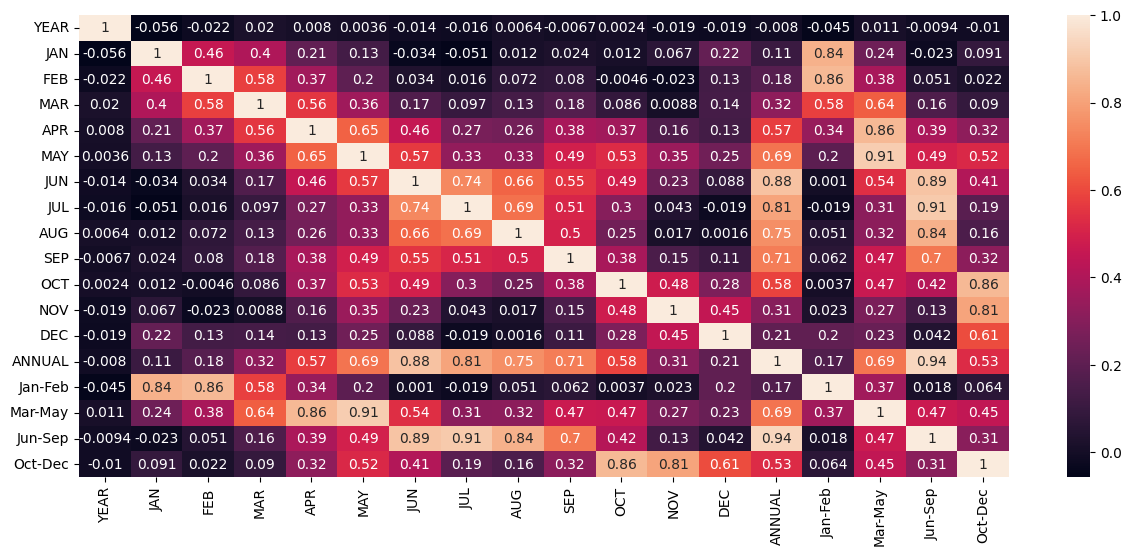

In [115]:
# plt.figure(figsize=(15,6))
# sns.heatmap(df.corr(),annot=True)
# plt.show()
plt.figure(figsize=(15,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

`The above heatmap shows the coorelation between different features in the dataset`

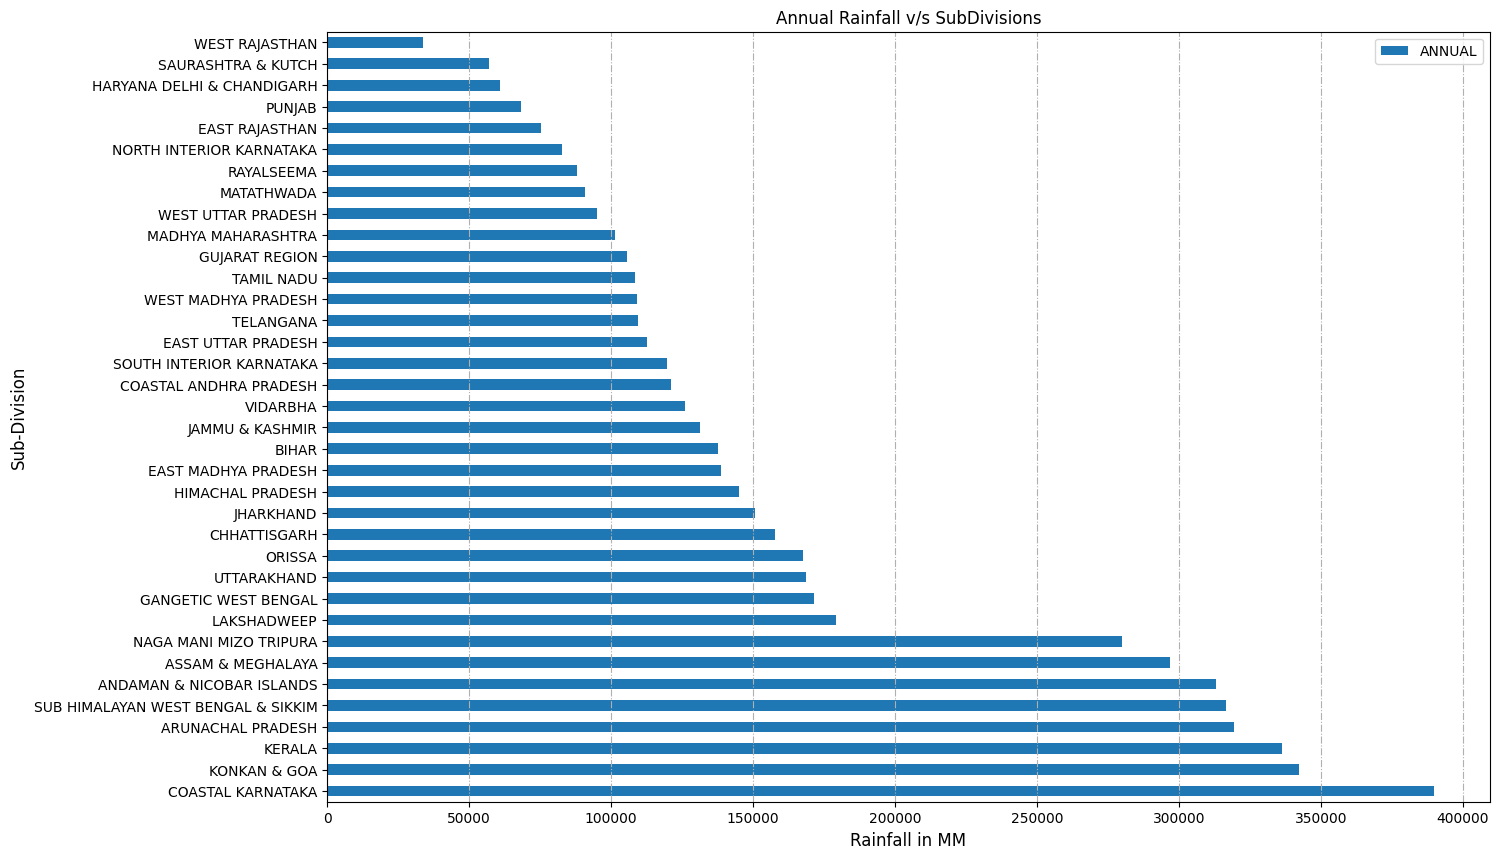

In [116]:
df[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

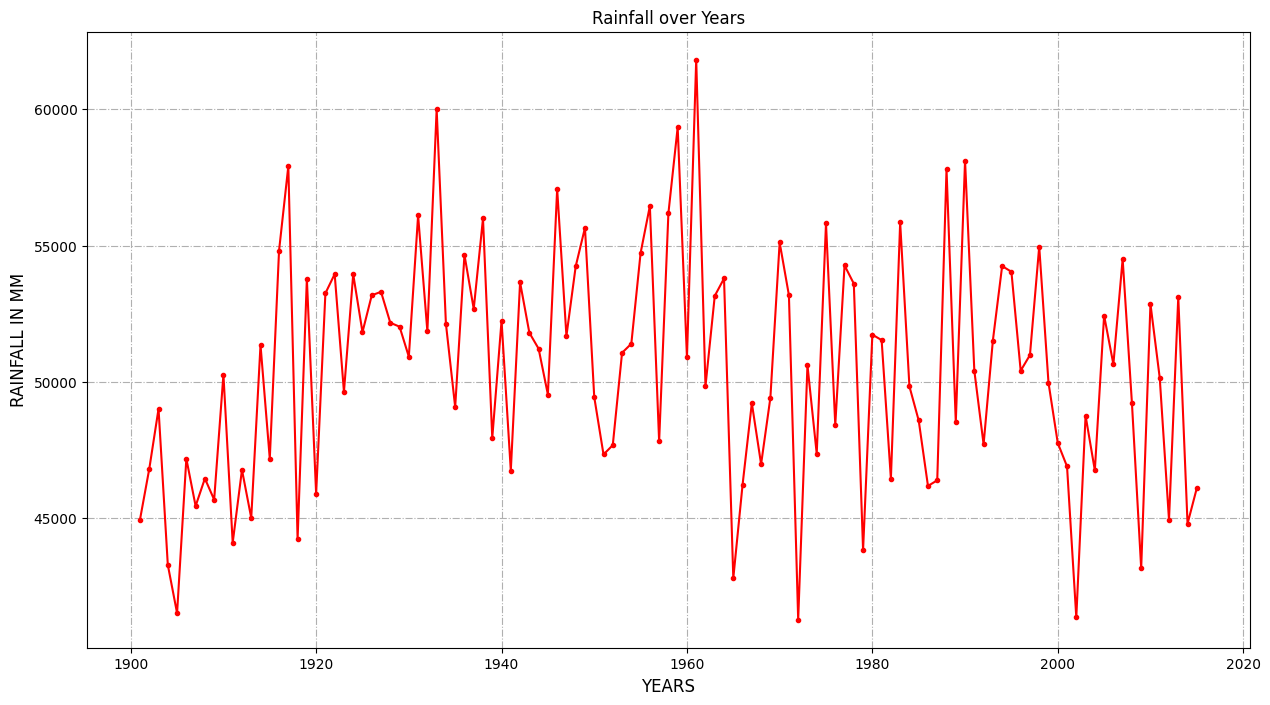

In [117]:
plt.figure(figsize=(15,8))
df.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

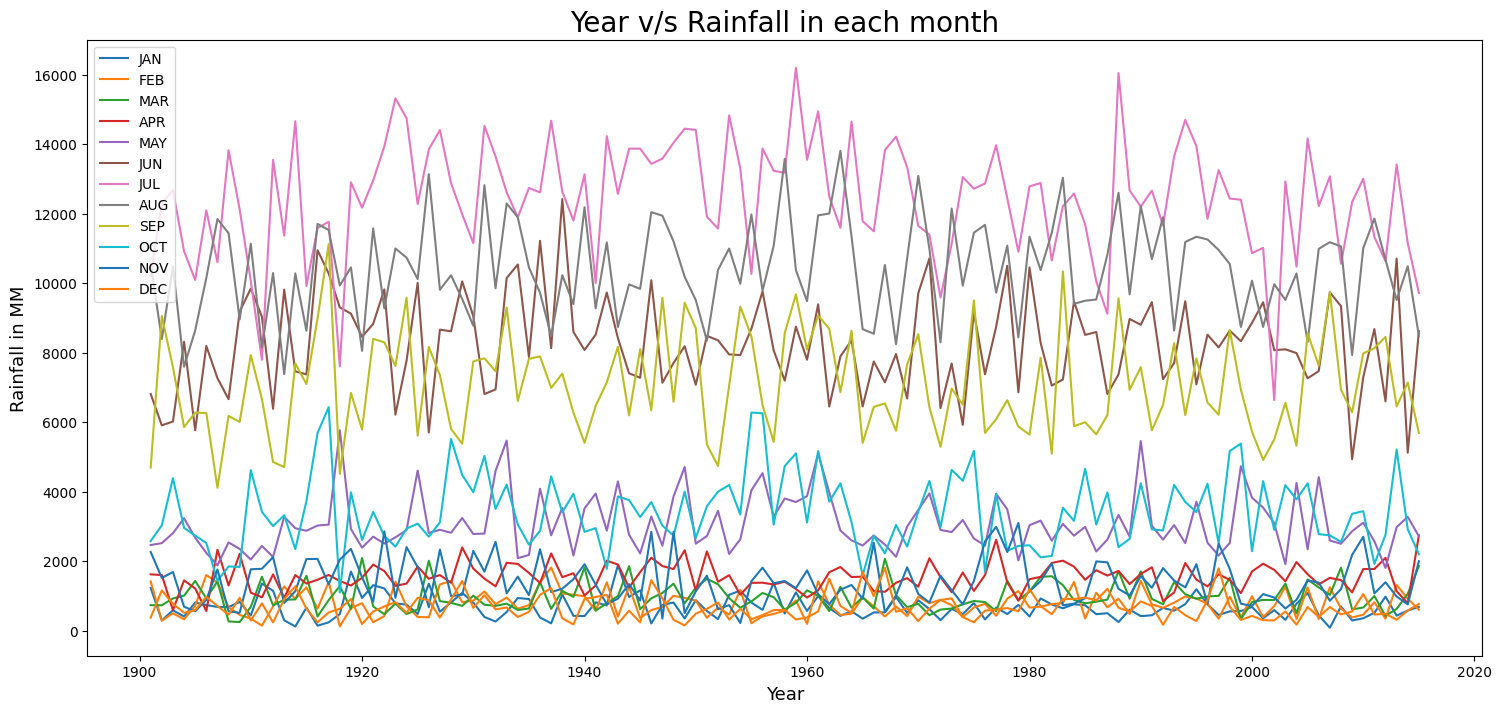

In [118]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

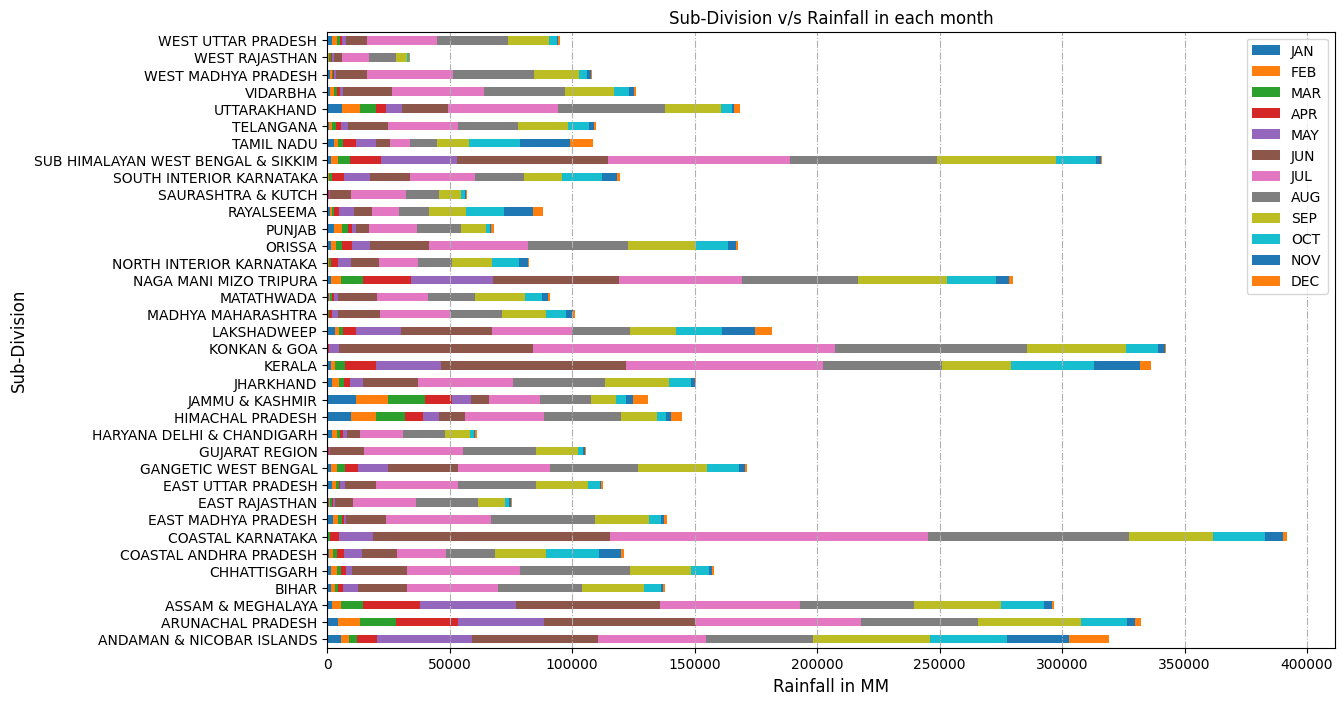

In [119]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

### Analysis of rainfall data of ANADAMAN & NICOBAR ISLANDS

In [120]:
V = df.loc[((df['SUBDIVISION'] == 'ANDAMAN & NICOBAR ISLANDS'))]
V.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


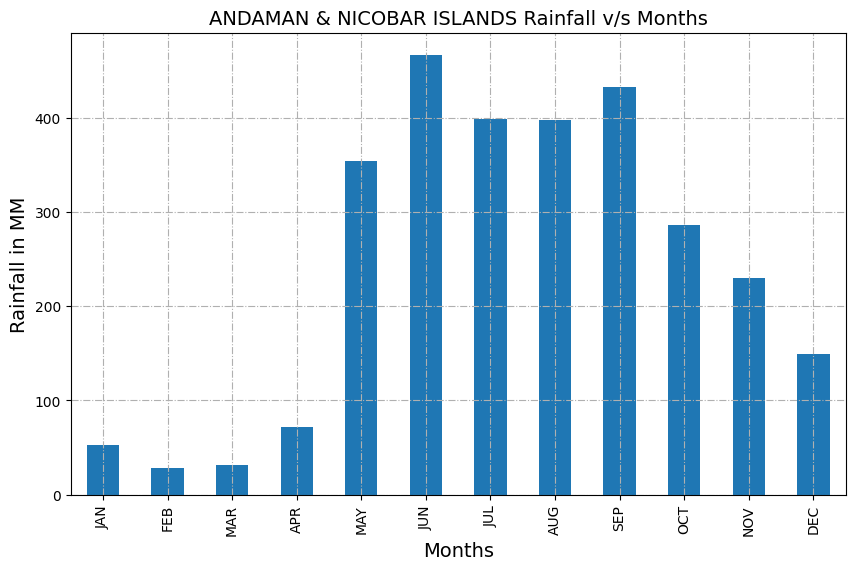

In [121]:
plt.figure(figsize=(10,6))
V[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("ANDAMAN & NICOBAR ISLANDS Rainfall v/s Months",size=14)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

`From the above graph we observe that:-
 1)Tamil Nadu has good amount of rainfall in JUL and AUG`

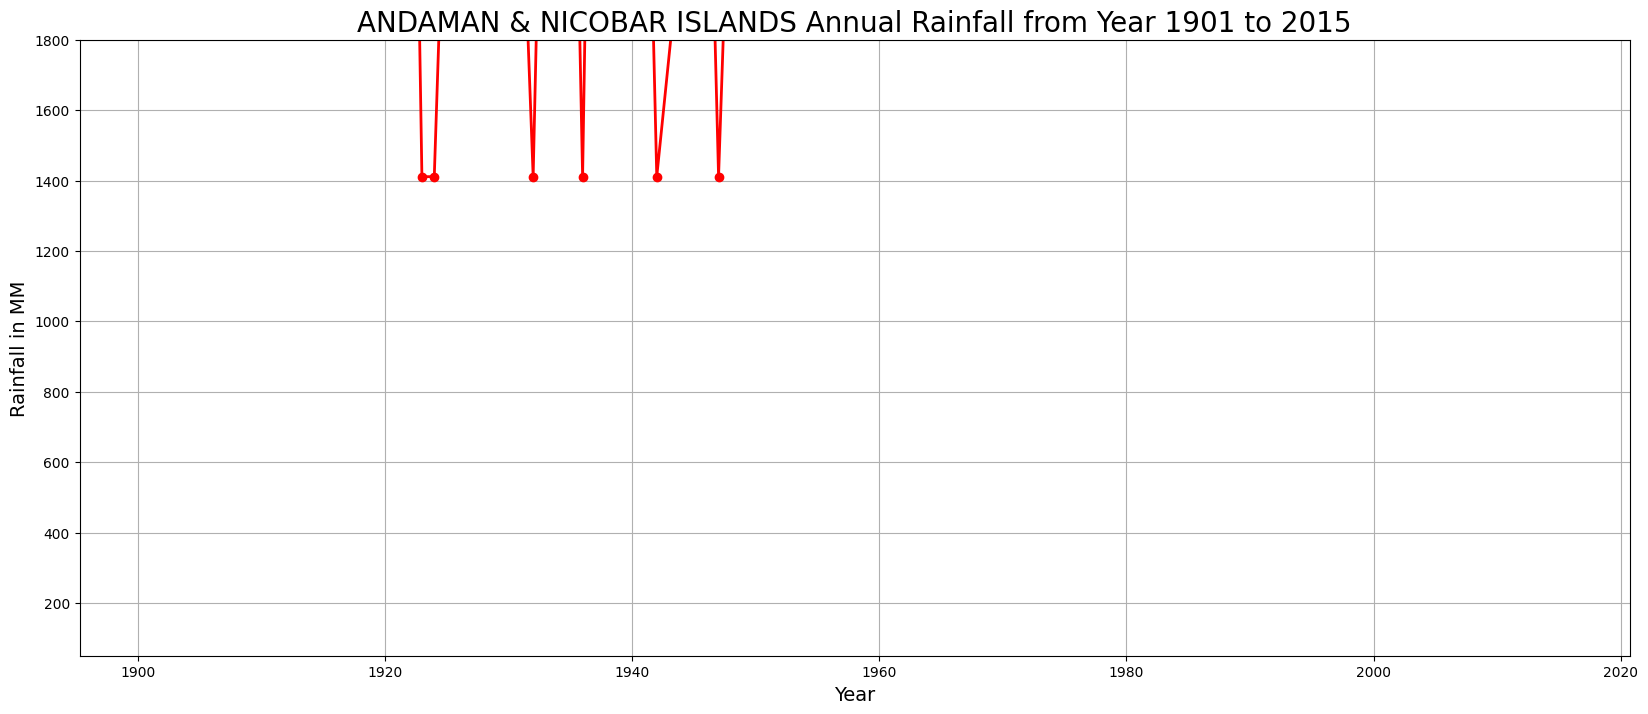

In [122]:
V.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1800),color='r',marker='o',linestyle='-',linewidth=2,figsize=(20,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('ANDAMAN & NICOBAR ISLANDS Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

## Modelling

In [123]:
df["SUBDIVISION"].nunique()

36

In [124]:
group = df.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
df = group.get_group('ANDAMAN & NICOBAR ISLANDS')
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7


In [125]:
df2=df.melt(['YEAR']).reset_index()
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,49.2
1,1,1902,JAN,0.0
2,2,1903,JAN,12.7
3,3,1904,JAN,9.4
4,4,1905,JAN,1.3


In [126]:
df2= df2[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df2.head()

,index,YEAR,variable,value
0,0,1901,JAN,49.2
110,110,1901,FEB,87.1
220,220,1901,MAR,29.2
330,330,1901,APR,2.3
440,440,1901,MAY,528.8


In [127]:
df2.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [128]:
df2.columns=['Index','Year','Month','Avg_Rainfall']

In [129]:
df2.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,49.2
110,110,1901,FEB,87.1
220,220,1901,MAR,29.2
330,330,1901,APR,2.3
440,440,1901,MAY,528.8


In [130]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df2['Month']=df2['Month'].map(Month_map)
df2.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,49.2
110,110,1901,2,87.1
220,220,1901,3,29.2
330,330,1901,4,2.3
440,440,1901,5,528.8
550,550,1901,6,517.5
660,660,1901,7,365.1
770,770,1901,8,481.1
880,880,1901,9,332.6
990,990,1901,10,388.5


In [131]:
df2.drop(columns="Index",inplace=True)

In [132]:
df2.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,49.2
110,1901,2,87.1


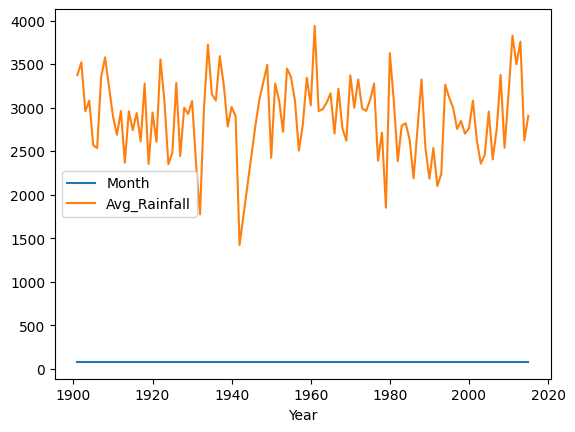

In [133]:
df2.groupby("Year").sum().plot()
plt.show()

In [209]:
X=np.asanyarray(df2[['Year','Month']]).astype('int')
y=np.asanyarray(df2['Avg_Rainfall']).astype('int')

In [210]:
X

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       ...,
       [2015,   10],
       [2015,   11],
       [2015,   12]])

In [211]:
X[:15]

array([[1901,    1],
       [1901,    2],
       [1901,    3],
       [1901,    4],
       [1901,    5],
       [1901,    6],
       [1901,    7],
       [1901,    8],
       [1901,    9],
       [1901,   10],
       [1901,   11],
       [1901,   12],
       [1902,    1],
       [1902,    2],
       [1902,    3]])

In [212]:
y

array([ 49,  87,  29, ..., 252, 236, 129])

In [213]:
print(X.shape)
print(y.shape)

(1320, 2)
(1320,)


In [214]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [215]:
X_train

array([[1966,    6],
       [1914,    8],
       [1995,    7],
       ...,
       [1949,   12],
       [2001,   10],
       [2013,    6]])

In [216]:
y_train

array([148, 520, 501, ...,   7, 267, 777])

### ❏ Linear Regression Model

In [238]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [239]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [240]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_test_predict),2)

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 149.07407901073572
MSE: 33129.733659285404
RMSE: 182.0157511296355
Explained Variance Score: 0.156274461233761 2

-------Train Data--------
MAE: 147.5896803057867
MSE: 33769.235962088715
RMSE: 183.7640769086513

-----Training Accuracy-------
15.6
-----Testing Accuracy--------
15.6


In [241]:
predicted = LR.predict([[2014,2]])

In [242]:
predicted

array([134.49315223])

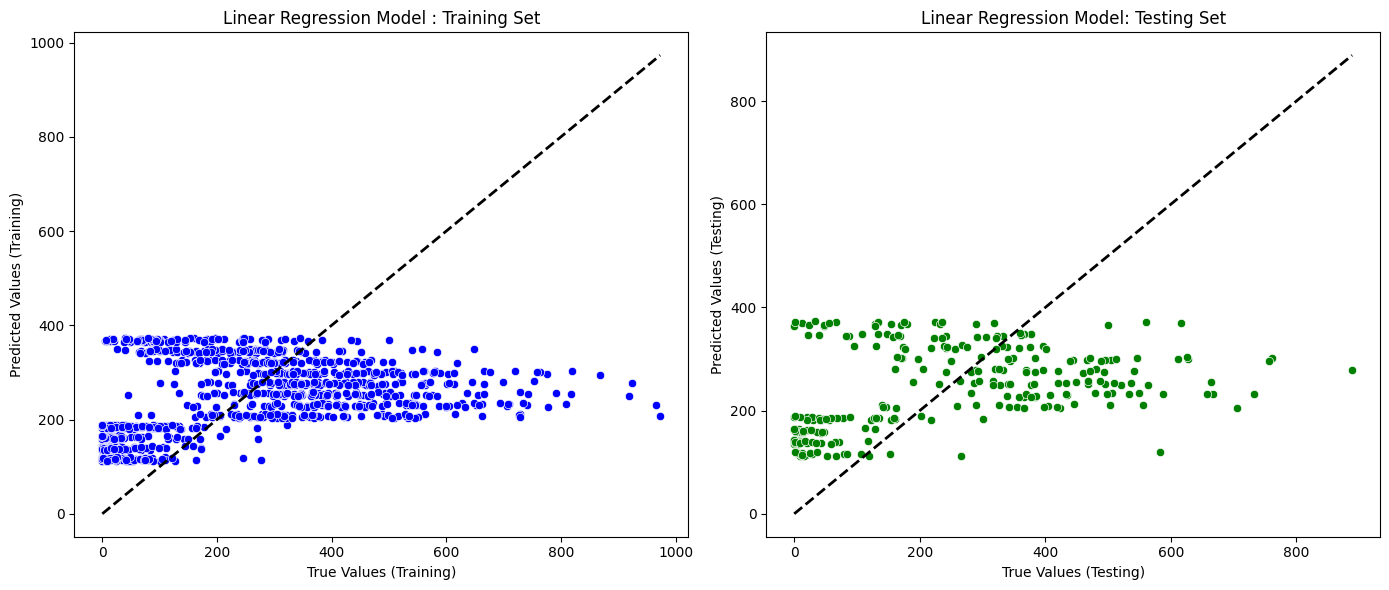

In [243]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Linear Regression Model : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Linear Regression Model: Testing Set")

# Show the plot
plt.tight_layout()
plt.show()


### ❏ Random Forest Model

In [228]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [229]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [230]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 89.26153009629056
MSE: 16111.669003358002
RMSE: 126.93174939059968

-------Train Data--------
MAE: 70.3459275344949
MSE: 9913.494979073936
RMSE: 99.56653543773598


In [231]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
75.2
-----------Testing Accuracy------------
59.0


In [232]:
predicted = random_forest_model.predict([[2014,2]])

In [233]:
predicted

array([50.45691856])

In [234]:
predicted = random_forest_model.predict([[2001,3]])

In [235]:
predicted

array([87.96833679])

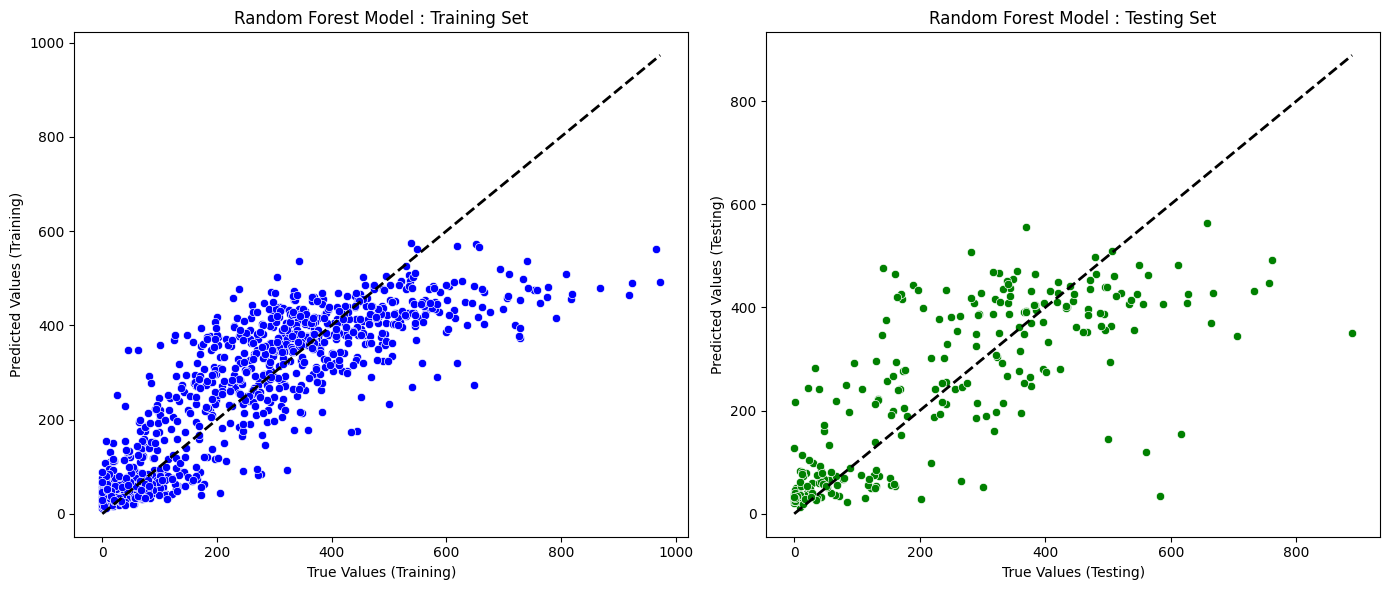

In [237]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Random Forest Model : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Random Forest Model : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()


### ❏ SVM

In [249]:
from sklearn import svm
svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train)

SVC()

In [250]:
y_train_predict=svm_regr.predict(X_train)
y_test_predict=svm_regr.predict(X_test)

In [251]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 238.7159090909091
MSE: 96237.6553030303
RMSE: 310.22194523120106

-------Train Data--------
MAE: 242.09185606060606
MSE: 98629.15625
RMSE: 314.0527921385193


In [252]:
print("-----------Training Accuracy------------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(svm_regr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
5.4
-----------Testing Accuracy------------
3.0


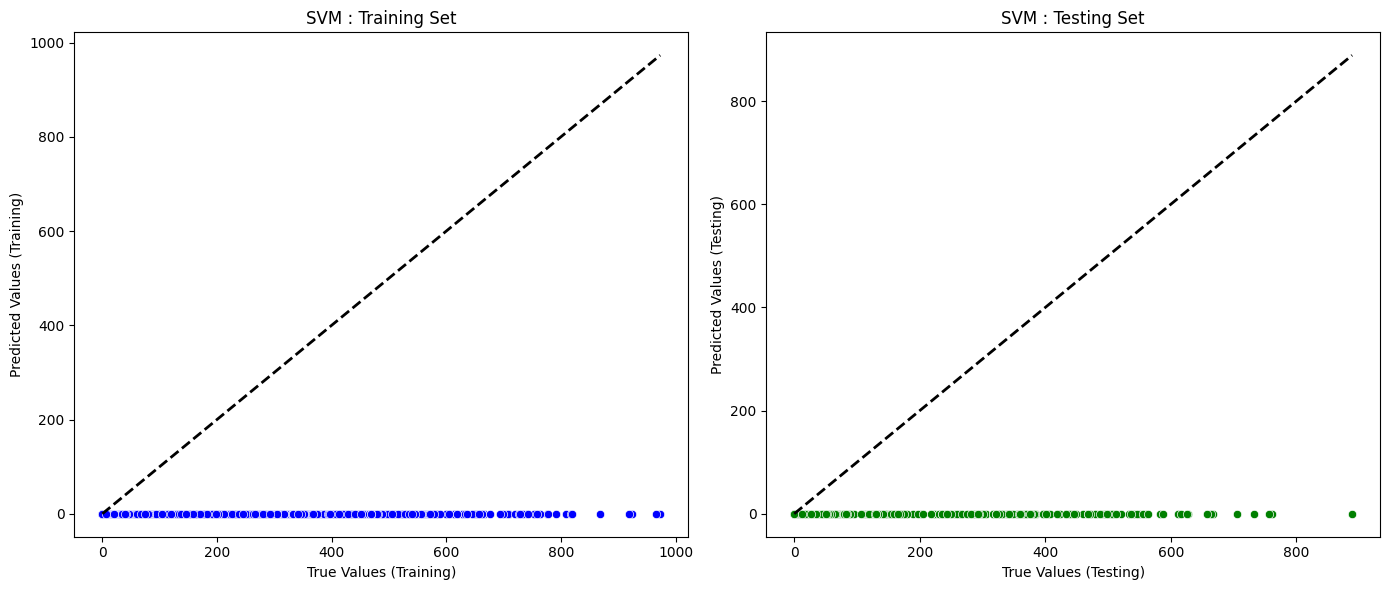

In [253]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("SVM : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("SVM : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()


### ❏ Logistic Regression

In [254]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(random_state=0,solver='lbfgs',class_weight='balanced', max_iter=10000)
logreg = LogisticRegression(random_state=0,solver='lbfgs')
logreg.fit(X_train,y_train)

c:\Users\Harshita Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [255]:
y_train_predict=logreg.predict(X_train)
y_test_predict=logreg.predict(X_test)

In [256]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 213.8598484848485
MSE: 83236.54924242424
RMSE: 288.50745093051626

-------Train Data--------
MAE: 215.47632575757575
MSE: 85098.71306818182
RMSE: 291.7168371352292


In [257]:
print("-----------Training Accuracy------------")
print(round(logreg.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(logreg.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
5.7
-----------Testing Accuracy------------
3.0


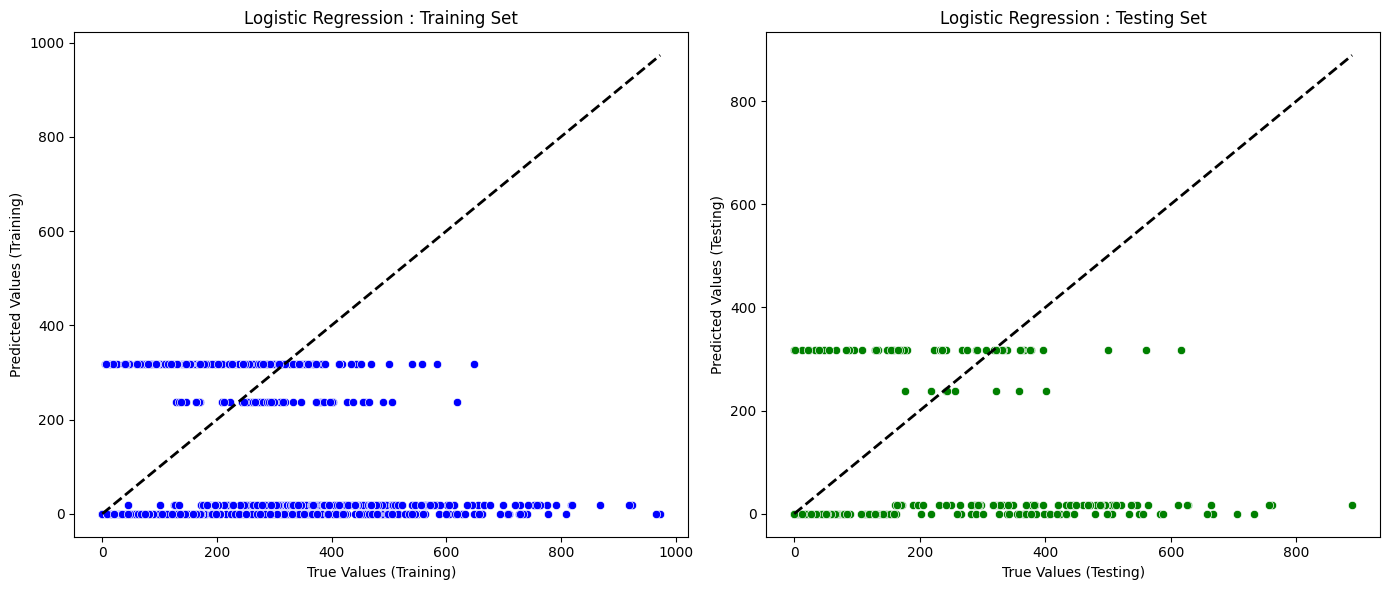

In [259]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Logistic Regression : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Logistic Regression : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()


### ❏ xgboost

In [260]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [261]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)

In [263]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 98.19750298469356
MSE: 18779.781202951912
RMSE: 137.0393418072048

-------Train Data--------
MAE: 30.698854301267684
MSE: 1870.059895232684
RMSE: 43.24418914990411


In [264]:
print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
95.3
-----------Testing Accuracy------------
52.2


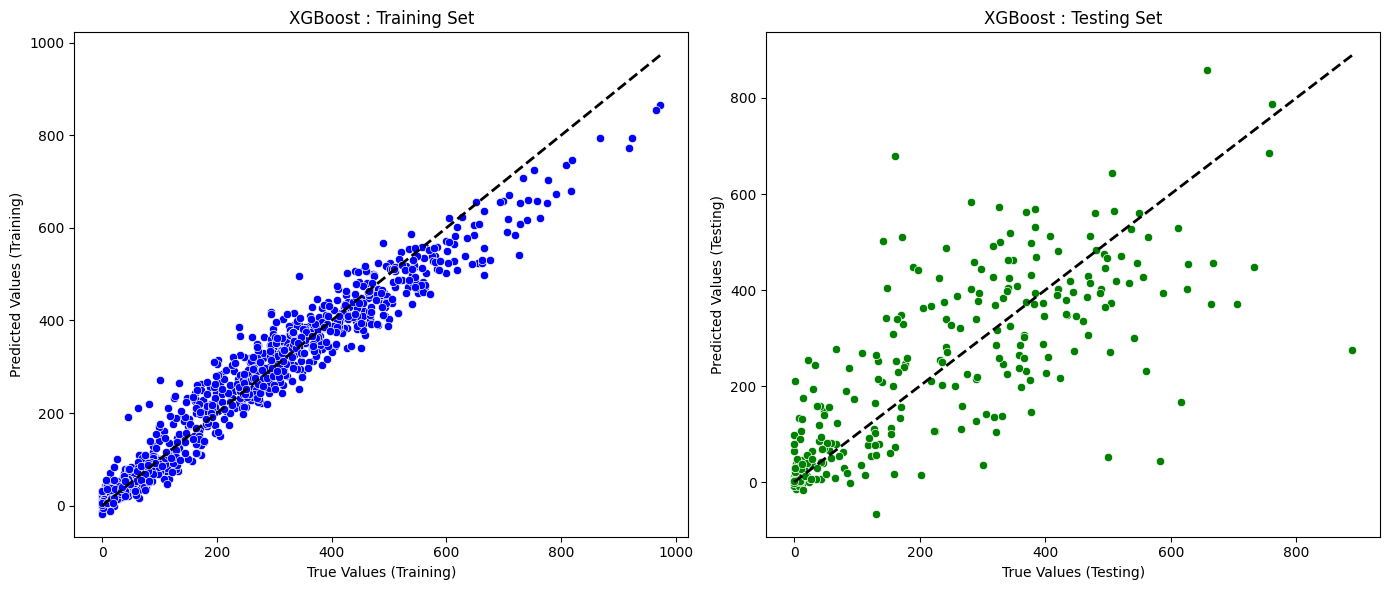

In [265]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("XGBoost : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("XGBoost : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()


### ❏ Gradient Boosting Regressor

In [266]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [267]:
y_train_predict=gbr.predict(X_train)
y_test_predict=gbr.predict(X_test)

In [268]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 86.29338682690286
MSE: 15077.690113936167
RMSE: 122.79124608023231

-------Train Data--------
MAE: 76.15964406913389
MSE: 11395.31965389969
RMSE: 106.74886254147953


In [269]:
print("-----------Training Accuracy------------")
print(round(gbr.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(gbr.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
71.5
-----------Testing Accuracy------------
61.6


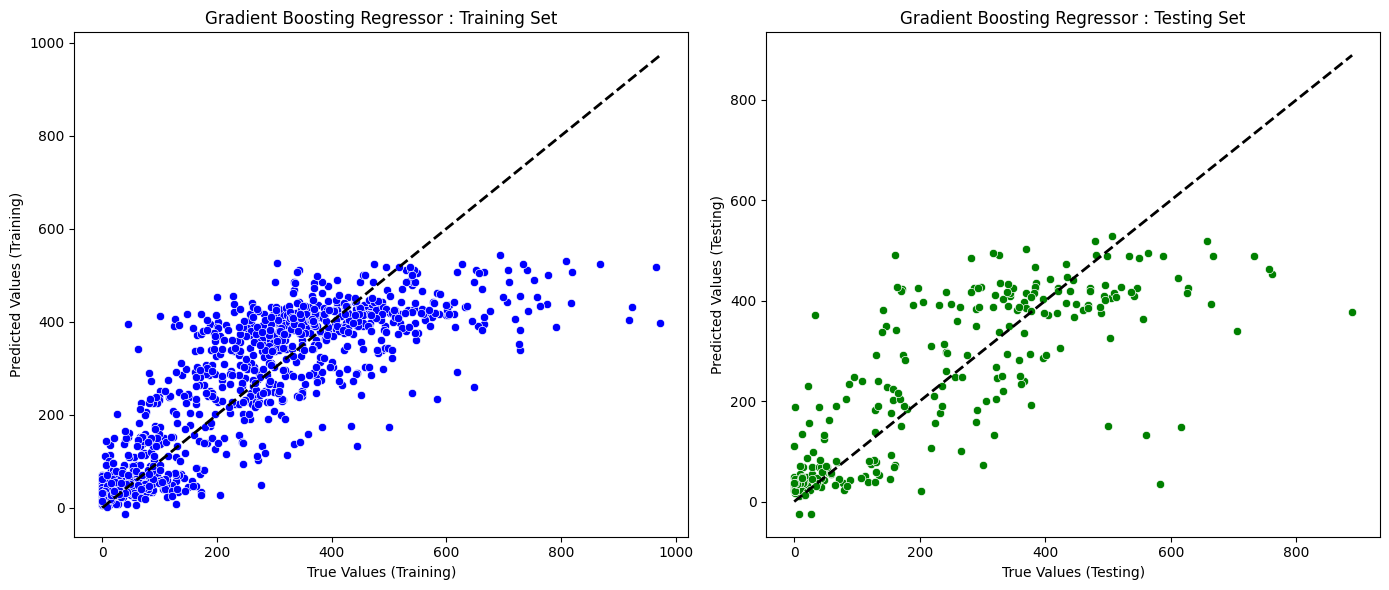

In [271]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Gradient Boosting Regressor : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Gradient Boosting Regressor : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()

# Ensemble Stacking

### ❏ Hybrid Model 1

The stacked model with meta learner = xgboost and the weak learners = Linear Regression, Random Forest and SVM

In [319]:
from mlxtend.regressor import StackingCVRegressor

In [320]:
stack = StackingCVRegressor(regressors=(LR, random_forest_model, svm_regr),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learnin...
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...),
                    random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [321]:
y_train_predict=stack.predict(X_train)
y_test_predict=stack.predict(X_test)

In [322]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 98.842630067558
MSE: 19889.013891854545
RMSE: 141.028415193019

-------Train Data--------
MAE: 81.96561893685298
MSE: 14826.014945074441
RMSE: 121.7621244274033


In [323]:
print("-----------Training Accuracy------------")
print(round(stack.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
63.0
-----------Testing Accuracy------------
49.3


In [277]:
print(f"Length of y_train: {len(y_train)}")
print(f"Length of y_train_predict: {len(y_train_predict)}")
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_test_predict: {len(y_test_predict)}")


Length of y_train: 1056
Length of y_train_predict: 1056
Length of y_test: 264
Length of y_test_predict: 264


<h4>Graph: XB Regressor</h4>

In [278]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1056, 2)
X_test shape: (264, 2)


### ❏ Hybrid Model 2

The stacked model with meta learner = Linear Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [279]:
stack2 = StackingCVRegressor(regressors=(LR, random_forest_model,svm_regr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack2.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                SVC()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [280]:
y_train_predict=stack2.predict(X_train)
y_test_predict=stack2.predict(X_test)

In [281]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 89.67412648266726
MSE: 16209.134714674583
RMSE: 127.31510010471885

-------Train Data--------
MAE: 70.6134812738343
MSE: 9969.404114078921
RMSE: 99.84690337751553


In [282]:
print("-----------Training Accuracy------------")
print(round(stack2.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack2.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
75.1
-----------Testing Accuracy------------
58.699999999999996


In [283]:
from sklearn.metrics import r2_score

In [284]:
score = r2_score(y_test, y_test_predict)

In [285]:
score

0.5870533500510748

### ❏ Hybrid Model 3

The stacked model with meta learner = Logistic Regression and the weak learners = Linear Regression, Random Forest and SVM 

In [286]:
stack3 = StackingCVRegressor(regressors=(LR, random_forest_model,logreg),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack3.fit(X_train, y_train)

c:\Users\Harshita Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Harshita Goyal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                LogisticRegression(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [287]:
y_train_predict=stack3.predict(X_train)
y_test_predict=stack3.predict(X_test)

In [288]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 89.51865528660853
MSE: 16136.328015968458
RMSE: 127.02884718034899

-------Train Data--------
MAE: 70.7971251376029
MSE: 9999.28067277725
RMSE: 99.99640329920497


In [289]:
print("-----------Training Accuracy------------")
print(round(stack3.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack3.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
75.0
-----------Testing Accuracy------------
58.9


### ❏ Hybrid Model 4

In [290]:
stack4 = StackingCVRegressor(regressors=(LR, random_forest_model,gbr),
                            meta_regressor=LR, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

StackingCVRegressor(cv=12, meta_regressor=LinearRegression(), random_state=42,
                    regressors=(LinearRegression(),
                                RandomForestRegressor(max_depth=100,
                                                      max_features='sqrt',
                                                      min_samples_leaf=4,
                                                      min_samples_split=10,
                                                      n_estimators=800),
                                GradientBoostingRegressor(random_state=0)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [291]:
y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)

In [293]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 86.66889123252616
MSE: 15142.935140884598
RMSE: 123.05663387597029

-------Train Data--------
MAE: 74.82307997821194
MSE: 10973.871612910092
RMSE: 104.7562485626041


In [294]:
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)

-----------Training Accuracy------------
72.6
-----------Testing Accuracy------------
61.4


In [295]:
import pickle
file = open("model.pkl","wb")
pickle.dump(stack4,file)
file.close()

In [192]:
from sklearn.metrics import mean_squared_error, r2_score

#Hybrid 4 accuracy

ValueError: x and y must be the same size

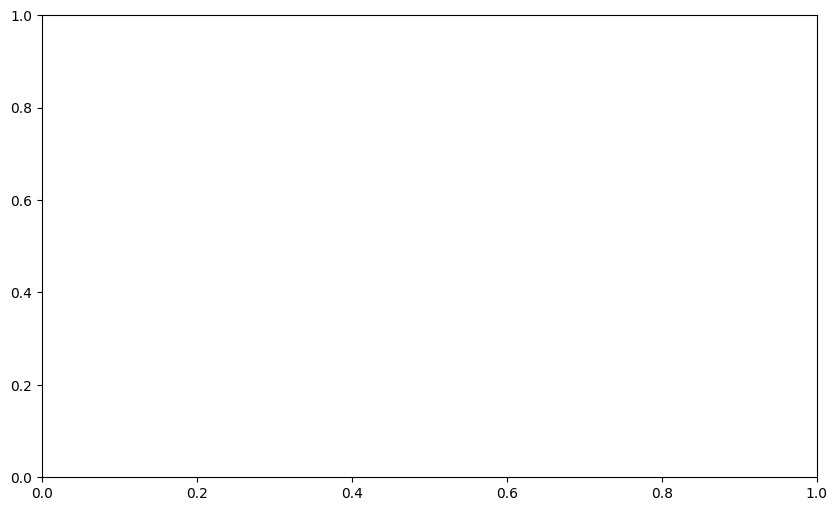

In [325]:
import matplotlib.pyplot as plt

# Use the final model stack4 to make predictions on the test set
y_pred = stack4.predict(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.6)

# Add labels and title
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')

# Add a line for perfect prediction (diagonal)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Add legend
plt.legend()

# Display the scatter plot
plt.show()


<h1> ACCURACY OF MODEL </h1>

In [296]:
# Load the model from the file
file = open("model.pkl", "rb")
loaded_model = pickle.load(file)
file.close()

# Predict with the final model
y_test_predict = loaded_model.predict(X_test)


In [297]:
from sklearn import metrics

# Calculate performance metrics
mae = metrics.mean_absolute_error(y_test, y_test_predict)
mse = metrics.mean_squared_error(y_test, y_test_predict)
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_test_predict)

# Print performance metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2_score}")


MAE: 86.66889123252616
MSE: 15142.935140884598
RMSE: 123.05663387597029
R-squared: 0.6142160302264049


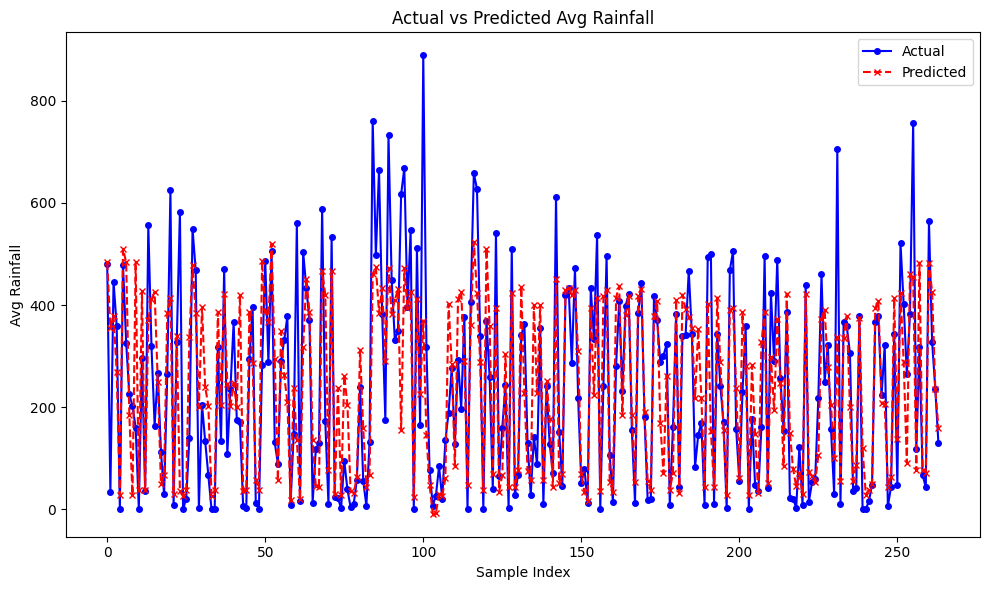

In [298]:
import matplotlib.pyplot as plt
import numpy as np

# Sorting by Year and Month for better visualization
sorted_idx = np.argsort(X_test[:, 0] + X_test[:, 1] / 12)

plt.figure(figsize=(10, 6))

plt.plot(np.arange(len(y_test)), y_test[sorted_idx], label='Actual', color='blue', marker='o', markersize=4)
plt.plot(np.arange(len(y_test)), y_test_predict[sorted_idx], label='Predicted', color='red', linestyle='--', marker='x', markersize=4)

plt.xlabel('Sample Index')
plt.ylabel('Avg Rainfall')
plt.title('Actual vs Predicted Avg Rainfall')
plt.legend()
plt.tight_layout()
plt.show()



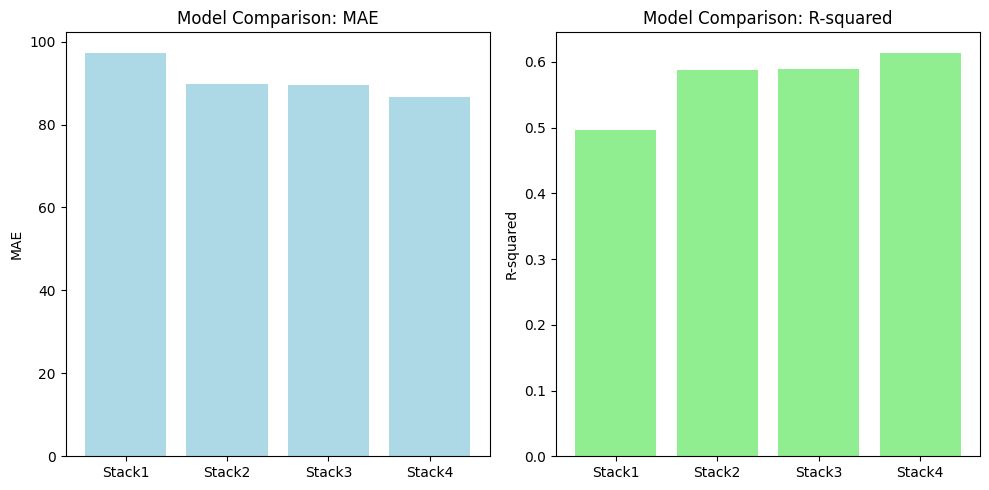

In [299]:
# Example of comparing multiple models

# Collect metrics from each model
models = [stack, stack2, stack3, stack4]
model_names = ['Stack1', 'Stack2', 'Stack3', 'Stack4']
mae_scores = []
r2_scores = []

for model in models:
    y_pred = model.predict(X_test)
    mae_scores.append(metrics.mean_absolute_error(y_test, y_pred))
    r2_scores.append(metrics.r2_score(y_test, y_pred))

# Plotting the bar graph
plt.figure(figsize=(10, 5))

# MAE Bar Graph
plt.subplot(1, 2, 1)
plt.bar(model_names, mae_scores, color='lightblue')
plt.ylabel('MAE')
plt.title('Model Comparison: MAE')

# R-squared Bar Graph
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_scores, color='lightgreen')
plt.ylabel('R-squared')
plt.title('Model Comparison: R-squared')

plt.tight_layout()
plt.show()


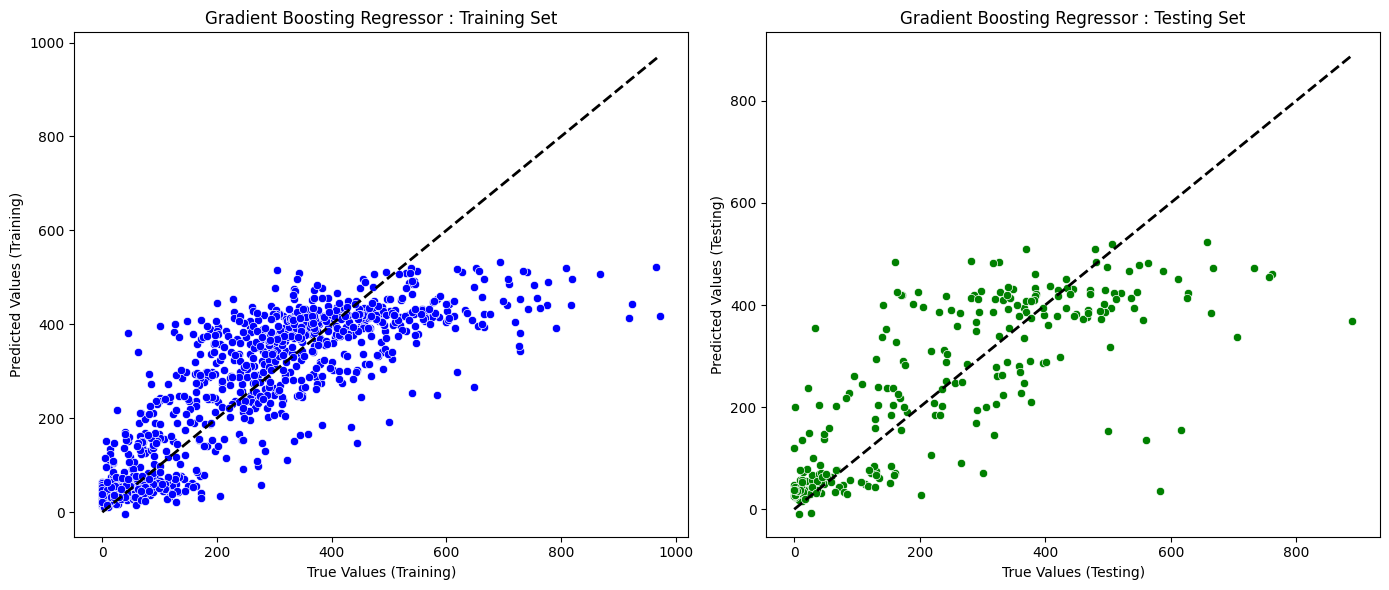

In [300]:
# True vs Predicted for Training Data
plt.figure(figsize=(14, 6))

# Plot for Training Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_predict, color="blue")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel("True Values (Training)")
plt.ylabel("Predicted Values (Training)")
plt.title("Gradient Boosting Regressor : Training Set")

# Plot for Testing Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_predict, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values (Testing)")
plt.ylabel("Predicted Values (Testing)")
plt.title("Gradient Boosting Regressor : Testing Set")

# Show the plot
plt.tight_layout()
plt.show()